In [27]:
import pandas as pd
data = pd.read_csv(r"C:\Users\mahmo\Downloads\first inten project.csv")

In [28]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [29]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [30]:
# Convert the column to datetime, coercing invalid dates to NaT
data['date of reservation'] = pd.to_datetime(data['date of reservation'], format='%m/%d/%Y', errors='coerce')

# Check for rows with invalid dates
invalid_dates = data[data['date of reservation'].isna()]
print(invalid_dates)

      Booking_ID  number of adults  number of children  \
2626    INN02627                 2                   0   
3677    INN03678                 1                   0   
5600    INN05601                 2                   0   
6343    INN06344                 1                   0   
7648    INN07649                 2                   1   
8000    INN08001                 2                   2   
8989    INN08990                 1                   0   
9153    INN09154                 2                   2   
9245    INN09246                 2                   0   
9664    INN09665                 1                   0   
9934    INN09935                 1                   0   
10593   INN10594                 2                   0   
10652   INN10653                 2                   0   
10747   INN10748                 2                   0   
11881   INN11882                 1                   0   
13958   INN13959                 1                   0   
14304   INN143

In [31]:
data.loc[data['date of reservation'].isna(), 'date of reservation'] = pd.to_datetime('2018-02-28')

In [32]:
print(data['date of reservation'].head())

0   2015-10-02
1   2018-11-06
2   2018-02-28
3   2017-05-20
4   2018-04-11
Name: date of reservation, dtype: datetime64[ns]


In [33]:
data.duplicated().sum()

0

In [54]:
data['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [37]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\mahmo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: ylabel='average price'>

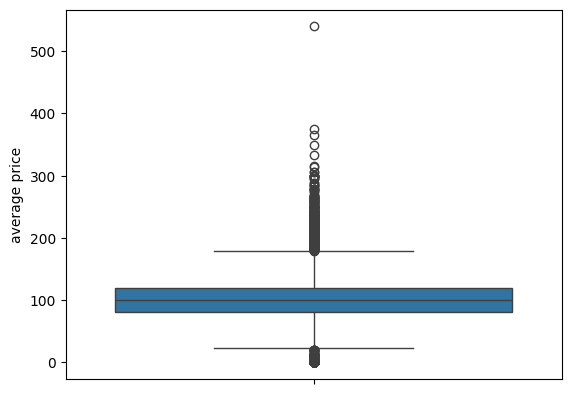

In [43]:
import seaborn as sns
sns.boxplot(data['average price'])

In [42]:
data.columns = data.columns.str.strip() #Remove extra space
print(data.columns) 

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


In [44]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 13:22:45.886730240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


<Axes: xlabel='average price', ylabel='Count'>

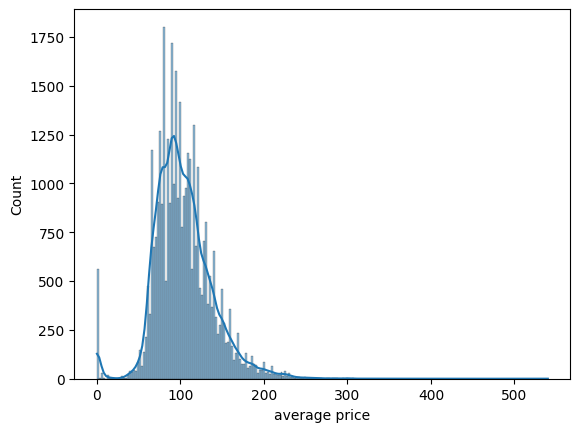

In [45]:
sns.histplot(data['average price'], kde=True)

<Axes: xlabel='count', ylabel='booking status'>

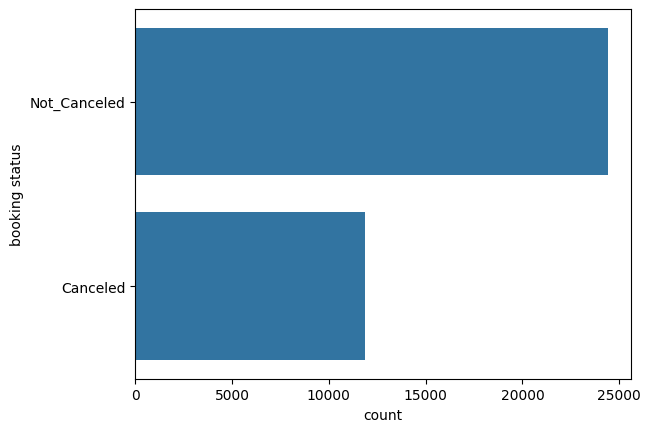

In [46]:
sns.countplot(data['booking status'])

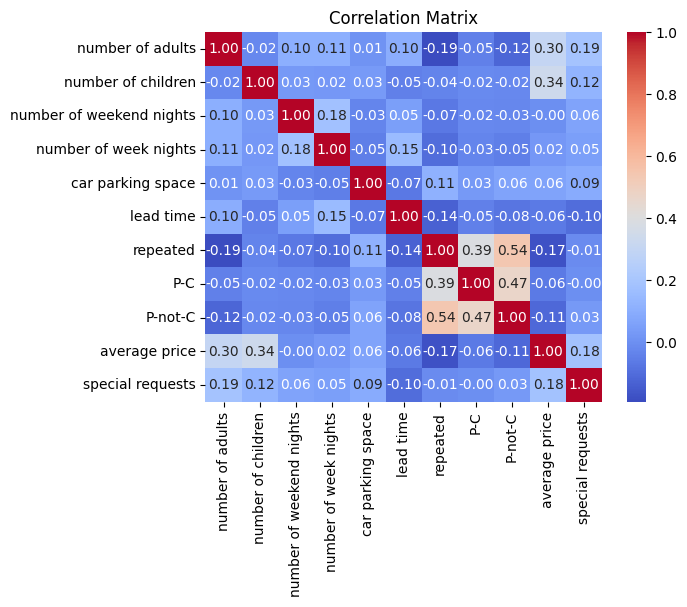

In [49]:
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [50]:
data['booking status'].value_counts(normalize=True) * 100

booking status
Not_Canceled    67.234394
Canceled        32.765606
Name: proportion, dtype: float64

<Axes: xlabel='booking status', ylabel='lead time'>

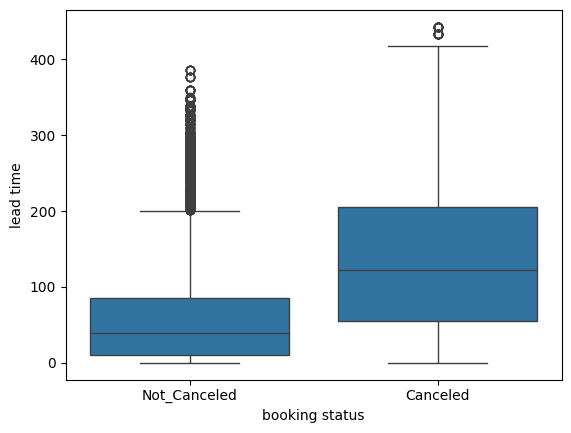

In [51]:
sns.boxplot(x='booking status', y='lead time', data=data)

<Axes: xlabel='special requests', ylabel='count'>

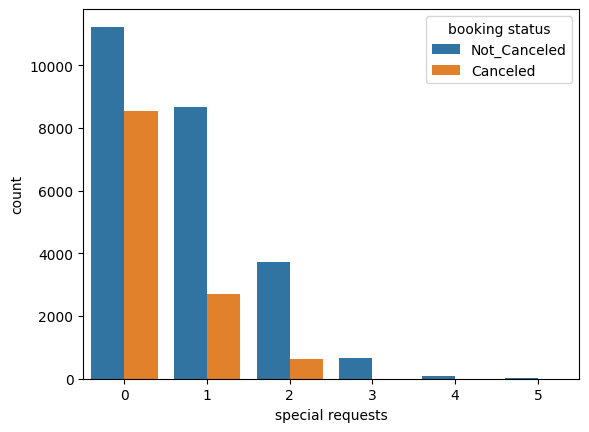

In [52]:
sns.countplot(x='special requests', hue='booking status', data=data)

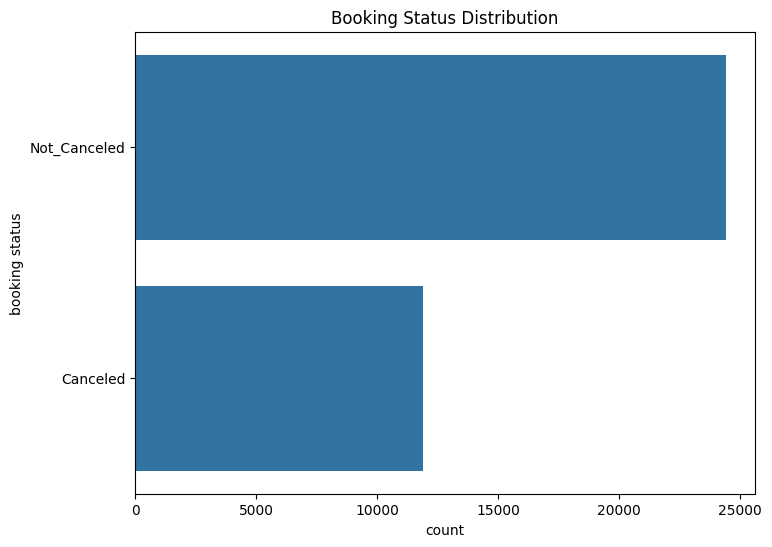

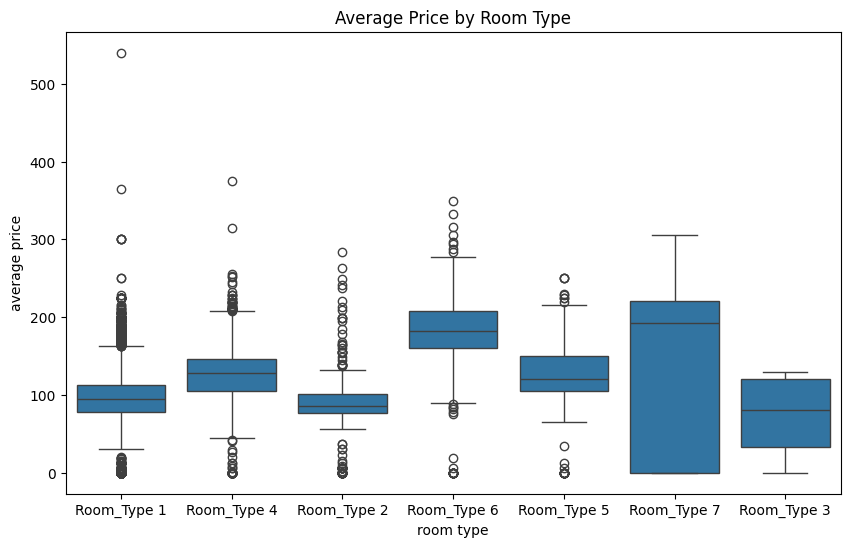

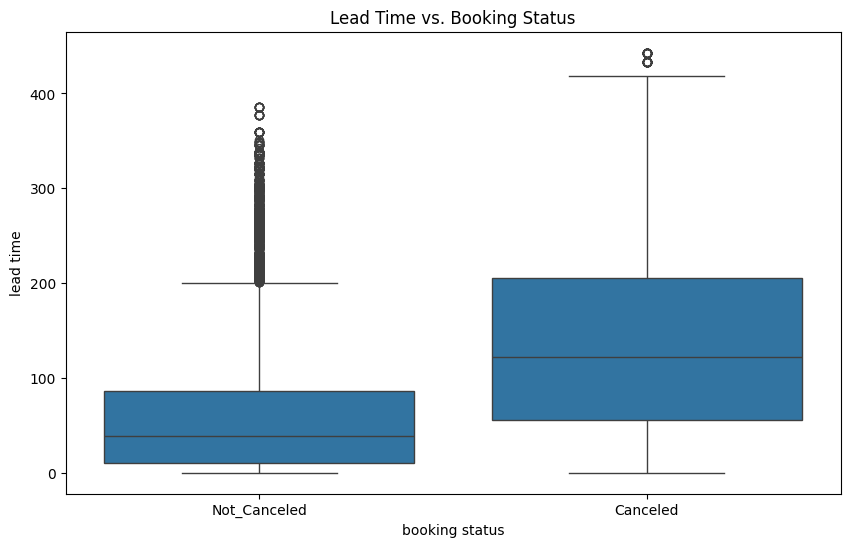

In [53]:
# Booking Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['booking status'])
plt.title('Booking Status Distribution')
plt.show()

# Average Price vs. Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='average price', data=data)
plt.title('Average Price by Room Type')
plt.show()

# Lead Time vs. Booking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time vs. Booking Status')
plt.show()

In [56]:
# Insights
print("Insights:")
print("- Bookings with longer lead times are more likely to be canceled.")
print("- Room Type 1 is the most popular, but Room Type 2 has a higher average price.")

Insights:
- Bookings with longer lead times are more likely to be canceled.
- Room Type 1 is the most popular, but Room Type 2 has a higher average price.
